In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

from scipy import stats
from scipy.stats import norm, skew
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

%matplotlib inline


# Data exploration


In [2]:
original_data = pd.read_csv("adult_data.csv")
original_test = pd.read_csv("adult_test.csv")

Имаме два дейтасета:
- original_data е тренировъчното множество с 32561 записа
- original_test е тренировъчното множество с 16281 записа

#### Описание на атрибутите
- age: възраст
- workclass: с кой сектор работи
- fnlwgt: брой хора от дадена група, представени от един запис, който олицетворява групата
- education: образование
- education.num: образованието под формата на число
- marital.status: семеен статус
- occupation: професия
- race: раса
- sex: пол
- capital.gain: капиталова печалба
- capital.loss: капиталова загуба
- hours.per.weel: брой часове за седмица, които човек работи
- native.country: родната страна на човек

- income: целевият атрибут(дали човек изкарва повече от 50К на година или не)

Имаме 14 атрибута и 1 целеви такъв. Някои от атрибутите са непрекъснати, а другите категорийни. 

In [3]:
def missing_values(x):
    return sum(x == ' ?') + sum (x == '?')

In [4]:
original_data.apply(missing_values)

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [5]:
original_test.apply(missing_values)

age                 0
workclass         963
fnlwgt              0
education           0
education.num       0
marital.status      0
occupation        966
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country    274
income              0
dtype: int64

In [6]:
original_data.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [7]:
original_test.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [8]:
original_data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
original_test.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


# Base-Baseline модел

In [10]:
log_reg = LogisticRegression()

X_train = original_data[['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']]
y_train = original_data['income']

X_test = original_test[['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']]
y_test = original_test['income']

log_reg.fit(X_train, y_train)
log_reg.predict(X_test)

print("train score:",log_reg.score(X_train, y_train))
print("test score:",log_reg.score(X_test, y_test))

/home/iliyan/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train score: 0.7977949080187955
test score: 0.7992138075056815


### Да разгледаме по-подробно атрибутите

Някои от атрибутите имат липсващи стойности, които са означени с "?".

Нека най-напред да видим целевия атрибут 'income'

In [11]:
set(original_data['income'])

{' <=50K', ' >50K'}

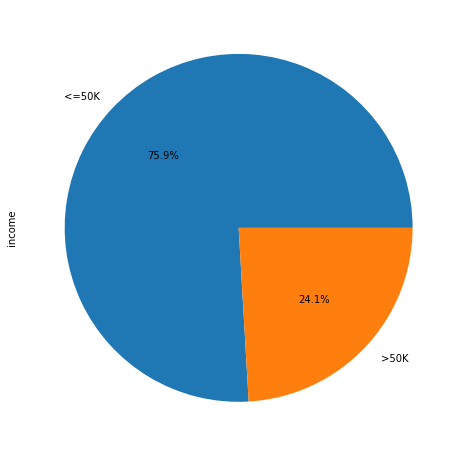

In [12]:
original_data['income'].value_counts().plot.pie(explode=None, figsize=(8, 8), autopct='%1.1f%%');

In [13]:
original_data['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

Имаме само 2 класа, като единият от тях е преобладаващ. На по-късен етап ще заменим '<=50K' с 0 и '>50K' с 1, но засега ще ги оставим така.

Нека погледнем какво е положението и при тестовото множество

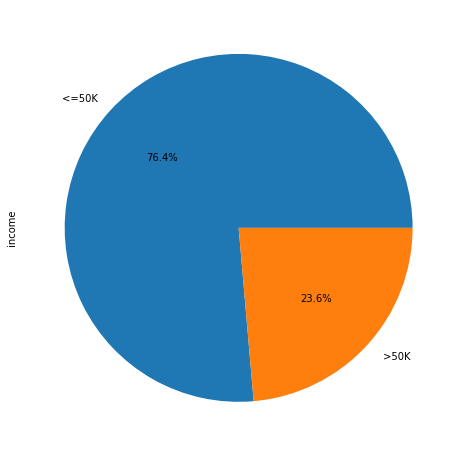

In [14]:
original_test['income'].value_counts().plot.pie(explode=None, figsize=(8, 8), autopct='%1.1f%%');

Виждаме, че е почти същото съотношение, като при original_data

Да разгледаме първия атрибут "age"

In [15]:
set(original_data['age'])

{17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 90}

Това са всичките стойности за атрибута "age". Няма липсващи стойности тук. На по-късен етап ще разделим стойностите на този атрибут в групи. Например от 0 до 10, 11 до 20 и т.н., като вземаме долната граница(т.е., ако човека е на 44 години, то ще го запишем, че е на 40). Така вместо 116 възможни стойности за възрастта, ще имаме само 9. Нека видим разпределението на атрибута.

/home/iliyan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


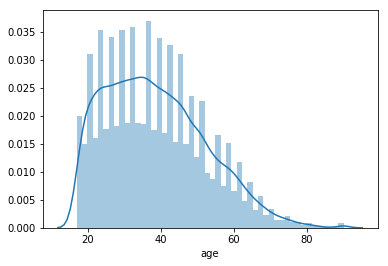

In [16]:
sns.distplot(original_data['age'])

In [17]:
def check_skewness(col):
    sns.distplot(original_data[col] , fit=norm);
    fig = plt.figure()
    res = stats.probplot(original_data[col], plot=plt)
    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(original_data[col])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


 mu = 38.58 and sigma = 13.64



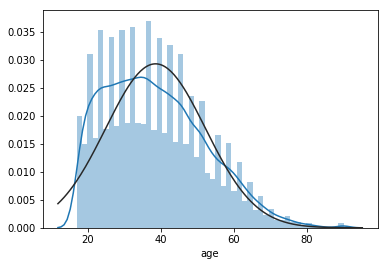

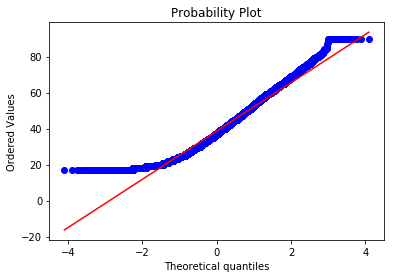

In [18]:
check_skewness('age')

Забелязва се леко Right-Skewed разпределение.

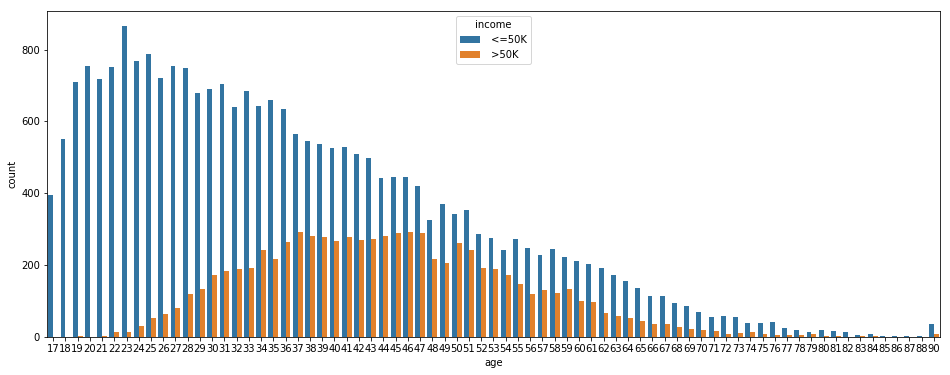

In [19]:
plt.figure(figsize=(16,6))
sns.countplot('age', hue='income', data=original_data);
plt.show()

Забелязваме, че хората, които изкарват >50К за година, са между 30 и 60 години, което е напълно нормално, както се вижда и от разпределнието(оранжевите чертички).

In [20]:
original_age = original_data['age'].copy()

Да разгледаме втория атрибут

In [21]:
set(original_data['workclass'])

{' ?',
 ' Federal-gov',
 ' Local-gov',
 ' Never-worked',
 ' Private',
 ' Self-emp-inc',
 ' Self-emp-not-inc',
 ' State-gov',
 ' Without-pay'}

Възможните стойности тук са 8, като има и липсващи такива. Нека видим атрибута на диаграма, след което ще обработим липсващите стойности. 

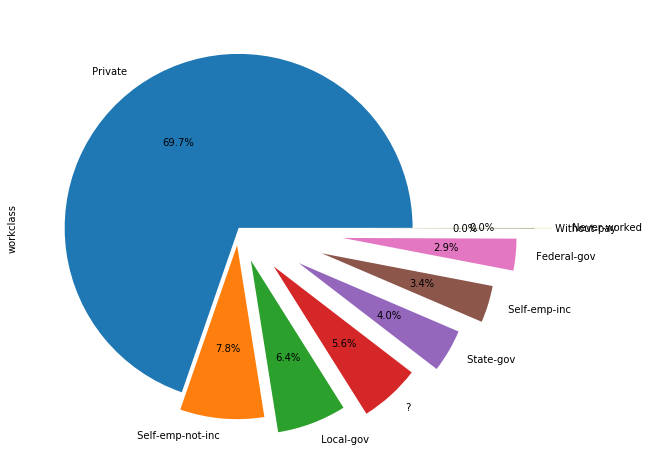

In [22]:
original_data['workclass'].value_counts().plot.pie(explode=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8], figsize=(8, 8), autopct='%1.1f%%');

In [23]:
original_data['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

За да опростим малко нещата, тези 8 възможни стойности ще ги намалим, като ги групираме.
- 'Federal-gov', 'Local-gov', 'State-gov' ще ги заменим с 'Government'
- 'Self-emp-inc', 'Self-emp-not-inc' ще ги заменим с 'Self-Employed'
- '?', 'Never-worked', 'Without-pay' ще ги заменим с 'Other'
- 'Private' си остава непроменен

In [24]:
original_data.workclass.replace([' Federal-gov', ' Local-gov', ' State-gov'], [' Government', ' Government', ' Government'], inplace = True)
original_data.workclass.replace([' Self-emp-inc', ' Self-emp-not-inc'], [' Self-Employed', ' Self-Employed'], inplace = True)
original_data.workclass.replace([' ?', ' Never-worked', ' Without-pay'], [' Other', ' Other', ' Other'], inplace = True)

In [25]:
set(original_data['workclass'])

{' Government', ' Other', ' Private', ' Self-Employed'}

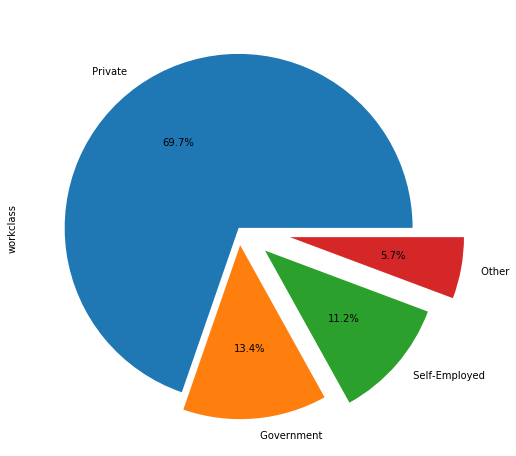

In [26]:
original_data['workclass'].value_counts().plot.pie(explode=[0,0.1,0.2,0.3], figsize=(8, 8), autopct='%1.1f%%');

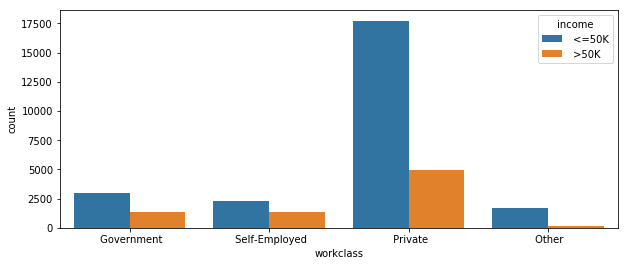

In [27]:
plt.figure(figsize=(10,4))
sns.countplot('workclass', hue='income', data=original_data);
plt.show()

Като съотношение 'Government' и 'Self-Employed' имат най-голям шанс да изкарат >50К, докато като брой най-много от 'Private' изкарват >50К, заради това, че са ~70%;

Да разгледаме третия атрибут "fnlwgt". Той означава final weight и представлява броят хора в разглеждана група, представяни от един пример.

In [28]:
len(set(original_data['fnlwgt']))

21648

In [29]:
"?" in set(original_data['fnlwgt'])

False

Има 21648 различни стойности, като няма липсващи такива. Нека видим разпределението ѝ. 

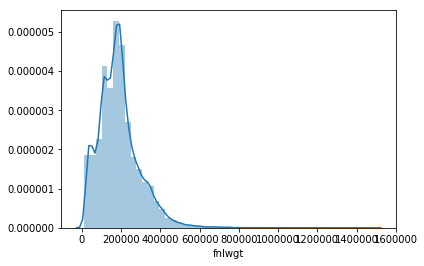

In [30]:
sns.distplot(original_data['fnlwgt'])

Ще логаритмуваме, за да имаме по-малки стойности, а и разпределението ще бъде нормално.

In [31]:
original_final_weight = original_data['fnlwgt'].copy()

In [32]:
fw = np.log1p(original_data['fnlwgt'])

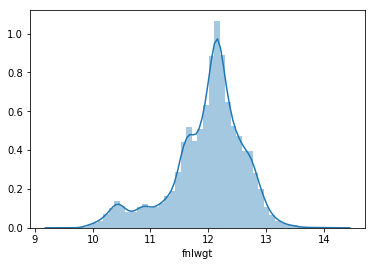

In [33]:
sns.distplot(fw)

Ще заменим стойностите на "fnlwgt" с техните логаритмувани.

In [34]:
original_data['fnlwgt'] = fw

In [35]:
len(set(original_data['fnlwgt']))

21648

Изглежда всичко е наред. Да продължим с 4-я и 5-я атрибут. Те са "education" и "education.num". Те всъщност отразяват една и съща информация, като при "education" стойностите са дискретни, а при "education.num" са непрекъснати. Нещо много важно е, че при "education.num", колкото по-голямо е числото, толкова "по-високо" е образован човек. 

In [36]:
original_data[['education', 'education.num']]

,education,education.num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13
5,Masters,14
6,9th,5
7,HS-grad,9
8,Masters,14
9,Bachelors,13


In [37]:
set(original_data['education'])

{' 10th',
 ' 11th',
 ' 12th',
 ' 1st-4th',
 ' 5th-6th',
 ' 7th-8th',
 ' 9th',
 ' Assoc-acdm',
 ' Assoc-voc',
 ' Bachelors',
 ' Doctorate',
 ' HS-grad',
 ' Masters',
 ' Preschool',
 ' Prof-school',
 ' Some-college'}

In [38]:
len(set(original_data['education']))

16

In [39]:
len(set(original_data['education.num']))

16

Няма липсващи стойности.
Тъй като двете колони предоставят една и съща информация, то може да премахнем едната. Премахваме 'education'.

In [40]:
original_data = original_data.drop("education", 1)

In [41]:
original_data

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,Government,11.258253,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-Employed,11.330348,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,12.281398,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,12.366157,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,12.732013,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,12.558780,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,11.984103,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-Employed,12.253161,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,10.731646,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,11.979486,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


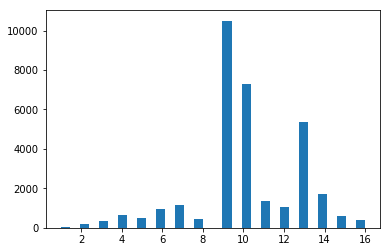

In [42]:
plt.hist(original_data["education.num"], bins=32);

In [43]:
original_data["education.num"].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education.num, dtype: int64

Първите три най-често срещани стойности са около 71% от всичките.

Нека видим каква е връзката между 'education.num' и целевия атрибут

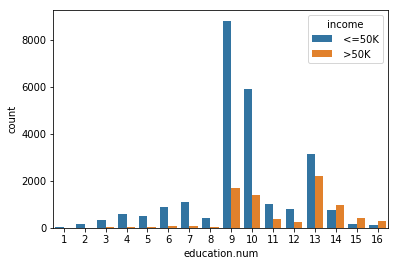

In [44]:
sns.countplot('education.num', hue='income', data=original_data);

Като че ли изглеждат логично.

Продължаваме с 6-я атрибут "marital.status"

In [45]:
set(original_data["marital.status"])

{' Divorced',
 ' Married-AF-spouse',
 ' Married-civ-spouse',
 ' Married-spouse-absent',
 ' Never-married',
 ' Separated',
 ' Widowed'}

In [46]:
original_data['marital.status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital.status, dtype: int64

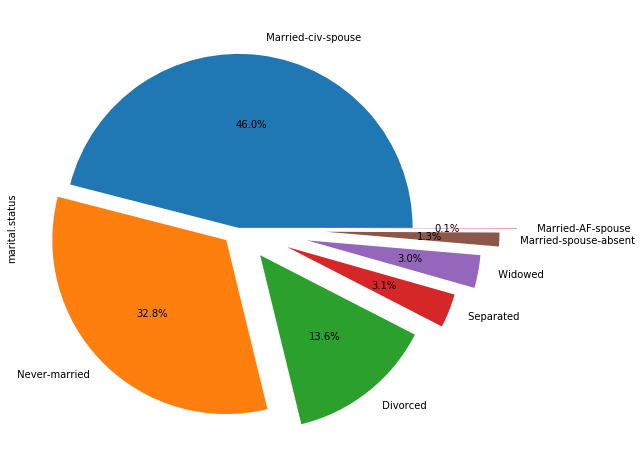

In [47]:
original_data['marital.status'].value_counts().plot.pie(explode=[0,0.1,0.2,0.3,0.4,0.5,0.6], figsize=(8, 8), autopct='%1.1f%%');

Ще направим следното групиране:
- 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent' стават 'Married'

In [48]:
original_data['marital.status'].replace([' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent'], [' Married', ' Married', ' Married'], inplace = True)

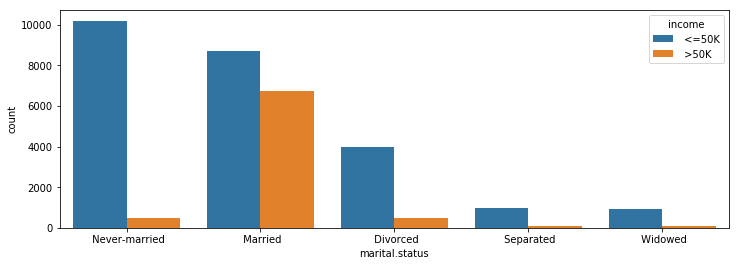

In [49]:
plt.figure(figsize=(12,4))
sns.countplot('marital.status', hue='income', data=original_data);
plt.show()

Изглежда, че когато си 'Married' има най-голяма вероятност да изкараш >50K

Продължаваме със 7-я атрибут "occupation"

In [50]:
set(original_data['occupation'])

{' ?',
 ' Adm-clerical',
 ' Armed-Forces',
 ' Craft-repair',
 ' Exec-managerial',
 ' Farming-fishing',
 ' Handlers-cleaners',
 ' Machine-op-inspct',
 ' Other-service',
 ' Priv-house-serv',
 ' Prof-specialty',
 ' Protective-serv',
 ' Sales',
 ' Tech-support',
 ' Transport-moving'}

Имаме 14 възможни стойности за атрибута 'occupation', като има наличие и на липсващи стойности.

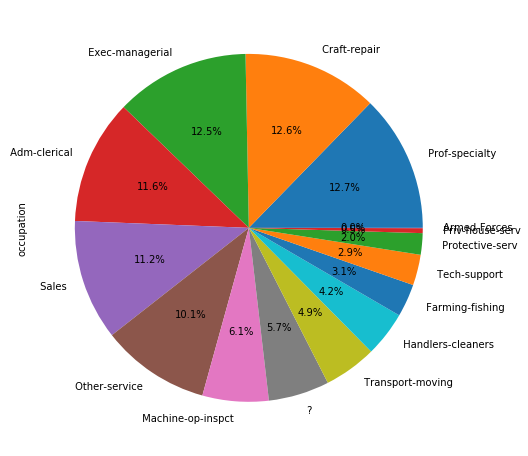

In [51]:
original_data['occupation'].value_counts().plot.pie(explode=None, figsize=(8, 8), autopct='%1.1f%%');

14 възможни стойности са много. По-добър вариант е да ги групираме, а това ще доведе и до по-прост модел. След малък research стигаме до следното:
- 'Adm-clerical', 'Exec-managerial' ще са под стойността 'White-Collar'
- 'Craft-repair', 'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct', 'Transport-moving' ще са под стойността 'Blue-Collar'
- 'Other-service', 'Priv-house-serv', 'Protective-serv', 'Tech-support' ще са под стойността 'Service'
- 'Prof-specialty' ще е 'Professional'
- '?', 'Armed-Forces' ще са под стойността 'Unknown'
- 'Sales' я оставяме непроменена

In [52]:
original_data.occupation.replace([' Adm-clerical', ' Exec-managerial'], [' White-Collar', ' White-Collar'], inplace = True)
original_data.occupation.replace([' Craft-repair', ' Farming-fishing', ' Handlers-cleaners', ' Machine-op-inspct', ' Transport-moving'], [' Blue-Collar', ' Blue-Collar', ' Blue-Collar', ' Blue-Collar', ' Blue-Collar'], inplace = True)
original_data.occupation.replace([' Other-service', ' Priv-house-serv', ' Protective-serv', ' Tech-support'], [' Service', ' Service', ' Service', ' Service'], inplace = True)
original_data.occupation.replace([' Prof-specialty'], [' Professional'], inplace = True)
original_data.occupation.replace([' ?', ' Armed-Forces'], [' Unknown', ' Unknown'], inplace = True)

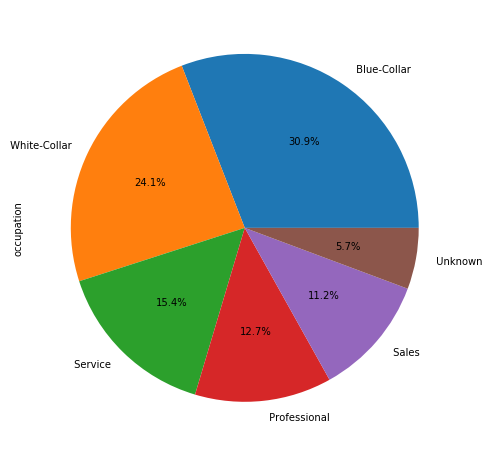

In [53]:
original_data['occupation'].value_counts().plot.pie(explode=None, figsize=(8, 8), autopct='%1.1f%%');

In [54]:
original_data['occupation'].value_counts()

 Blue-Collar     10062
 White-Collar     7836
 Service          5021
 Professional     4140
 Sales            3650
 Unknown          1852
Name: occupation, dtype: int64

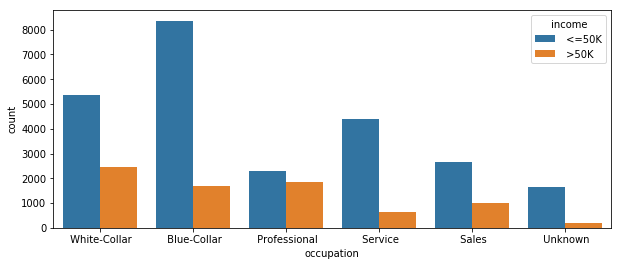

In [55]:
plt.figure(figsize=(10,4))
sns.countplot('occupation', hue='income', data=original_data);
plt.show()

Продължаваме със следващия атрибут "relationship".

In [56]:
set(original_data['relationship'])

{' Husband',
 ' Not-in-family',
 ' Other-relative',
 ' Own-child',
 ' Unmarried',
 ' Wife'}

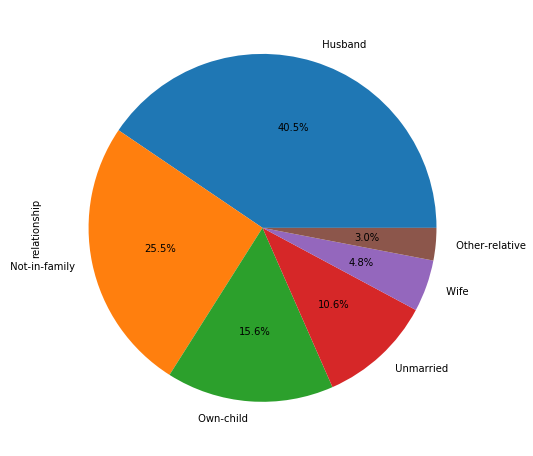

In [57]:
original_data['relationship'].value_counts().plot.pie(explode=None, figsize=(8, 8), autopct='%1.1f%%');

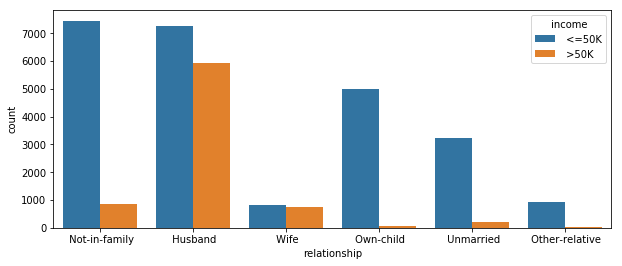

In [58]:
plt.figure(figsize=(10,4))
sns.countplot('relationship', hue='income', data=original_data);
plt.show()

Вероятността да се печелят >50К е най-голяма, когато си 'Husband' или 'Wife', което както видяхме и малко по-нагоре, най-голяма вероятност да правиш >50К е, когато си 'Married'

Следващият атрибут е "race"

In [59]:
set(original_data['race'])

{' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other', ' White'}

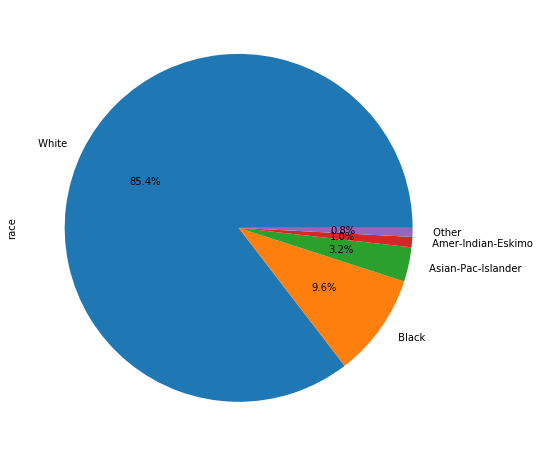

In [60]:
original_data['race'].value_counts().plot.pie(explode=None, figsize=(8, 8), autopct='%1.1f%%');

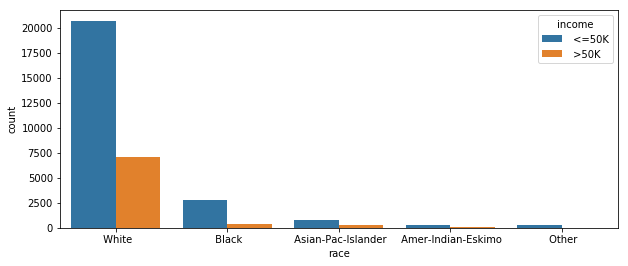

In [61]:
plt.figure(figsize=(10,4))
sns.countplot('race', hue='income', data=original_data);
plt.show()

Голям процент от 'White', а също така и от 'Asian-Pac-Islander' най-често печелят >50K.

Продължаваме с разглеждането на атрибута "sex"

In [62]:
set(original_data['sex'])

{' Female', ' Male'}

Само 2 стойности...Малко старомодно, но ... :D 

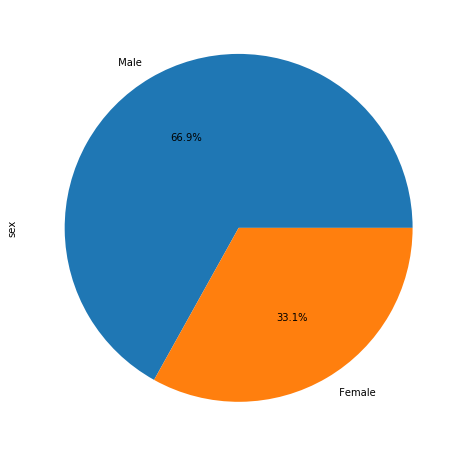

In [63]:
original_data['sex'].value_counts().plot.pie(explode=None, figsize=(8, 8), autopct='%1.1f%%');

In [64]:
original_data['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

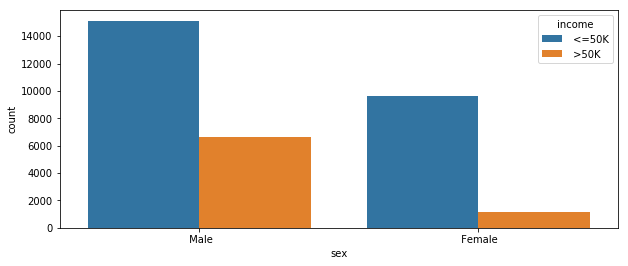

In [65]:
plt.figure(figsize=(10,4))
sns.countplot('sex', hue='income', data=original_data);
plt.show()

Виждаме, че това да си мъж оказва доста влияние на дохода. 

Следващият атрибут, който ще разгледаме е "capital.gain"

In [66]:
set(original_data['capital.gain'])

{0,
 114,
 401,
 594,
 914,
 991,
 1055,
 1086,
 1111,
 1151,
 1173,
 1409,
 1424,
 1455,
 1471,
 1506,
 1639,
 1797,
 1831,
 1848,
 2009,
 2036,
 2050,
 2062,
 2105,
 2174,
 2176,
 2202,
 2228,
 2290,
 2329,
 2346,
 2354,
 2387,
 2407,
 2414,
 2463,
 2538,
 2580,
 2597,
 2635,
 2653,
 2829,
 2885,
 2907,
 2936,
 2961,
 2964,
 2977,
 2993,
 3103,
 3137,
 3273,
 3325,
 3411,
 3418,
 3432,
 3456,
 3464,
 3471,
 3674,
 3781,
 3818,
 3887,
 3908,
 3942,
 4064,
 4101,
 4386,
 4416,
 4508,
 4650,
 4687,
 4787,
 4865,
 4931,
 4934,
 5013,
 5060,
 5178,
 5455,
 5556,
 5721,
 6097,
 6360,
 6418,
 6497,
 6514,
 6723,
 6767,
 6849,
 7298,
 7430,
 7443,
 7688,
 7896,
 7978,
 8614,
 9386,
 9562,
 10520,
 10566,
 10605,
 11678,
 13550,
 14084,
 14344,
 15020,
 15024,
 15831,
 18481,
 20051,
 22040,
 25124,
 25236,
 27828,
 34095,
 41310,
 99999}

Има 116 възможни стойности

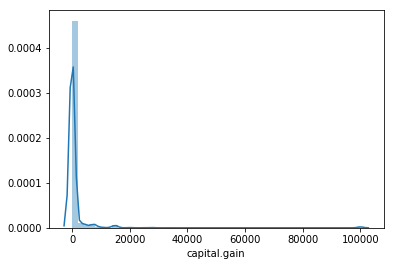

In [67]:
sns.distplot(original_data['capital.gain'])

In [68]:
original_data['capital.gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
5178        97
3103        97
4386        70
5013        69
8614        55
3325        53
2174        48
10520       43
4064        42
4650        41
14084       41
20051       37
3137        37
27828       34
594         34
3908        32
2829        31
13550       27
6849        27
14344       26
1055        25
2885        24
3411        24
4787        23
2176        23
         ...  
9562         4
1086         4
25124        4
1424         3
2961         3
7896         3
4687         3
2936         3
1173         3
5721         3
2009         3
6360         3
41310        2
6723         2
3456         2
2993         2
401          2
11678        2
2062         2
18481        2
7978         1
1639         1
2538         1
2387         1
5060         1
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capital.gain, Length: 119, dtype: int64

92% oт стойностите са 0, затова този атрибут ще го премахнем.

In [69]:
original_capital_gain = original_data['capital.gain'].copy()

In [70]:
original_data = original_data.drop("capital.gain", 1)

Продължаваме с разглеждането на следващия атрибут "capital.loss"

In [71]:
len(set(original_data['capital.loss']))

92

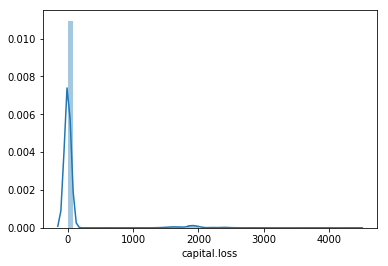

In [72]:
sns.distplot(original_data['capital.loss'])

In [73]:
original_data['capital.loss'].value_counts()

0       31042
1902      202
1977      168
1887      159
1848       51
1485       51
2415       49
1602       47
1740       42
1590       40
1876       39
1672       34
1564       25
2258       25
1669       24
1741       24
2001       24
1980       23
1719       22
2002       21
2051       21
1408       21
1579       20
2377       20
1721       18
1504       18
1974       18
2339       17
2179       15
1628       15
        ...  
323         3
4356        3
2267        3
3683        2
1755        2
2352        2
1648        2
1138        2
810         2
1735        2
2238        2
2754        2
3004        2
3900        2
974         2
2149        2
1816        2
3770        2
2080        1
2489        1
2282        1
2163        1
155         1
2467        1
1844        1
1411        1
1539        1
2472        1
1944        1
2201        1
Name: capital.loss, Length: 92, dtype: int64

Аналогичен случай като при "capital.gain". Премахваме и този атрибут.

In [74]:
original_capital_loss = original_data['capital.loss'].copy()

In [75]:
original_data = original_data.drop("capital.loss", 1)

Следващият атрибут е "hours.per.week"

In [76]:
len(set(original_data['hours.per.week']))

94

Заради многото възможни стойности, може би ще е по-добре да ги разпределим в групи, подобно на 'age'.

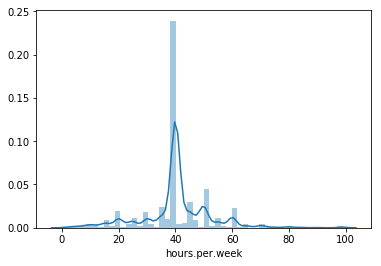

In [77]:
sns.distplot(original_data['hours.per.week'])

Тук всичко изглежда напълно в реда на нещата

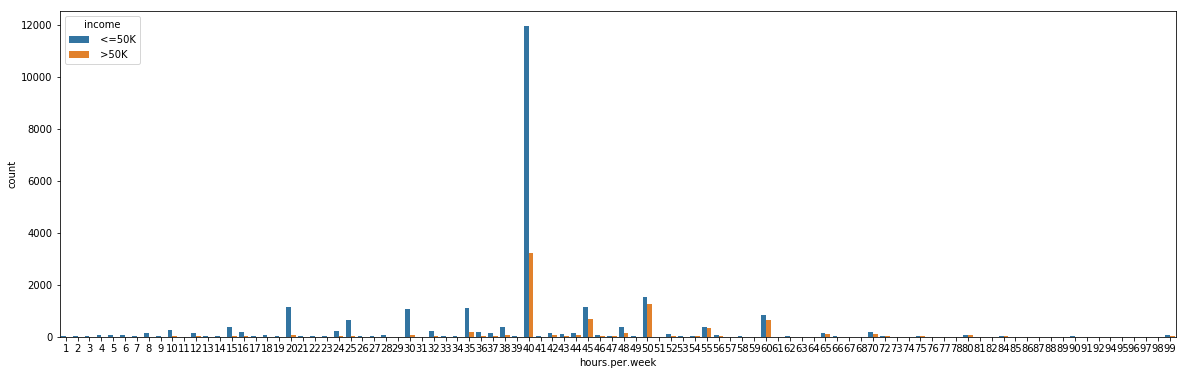

In [78]:
plt.figure(figsize=(20,6))
sns.countplot('hours.per.week', hue='income', data=original_data);
plt.show()

In [79]:
original_data['hours.per.week'].value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
20     1224
30     1149
55      694
25      674
48      517
38      476
15      404
70      291
10      278
32      266
24      252
65      244
36      220
42      219
44      212
16      205
12      173
43      151
37      149
8       145
52      138
80      133
56       97
28       86
99       85
      ...  
19       14
64       14
51       13
85       13
68       12
98       11
11       11
63       10
78        8
29        7
77        6
59        5
31        5
96        5
67        4
91        3
76        3
81        3
73        2
89        2
97        2
88        2
86        2
61        2
95        2
92        1
94        1
87        1
74        1
82        1
Name: hours.per.week, Length: 94, dtype: int64

In [80]:
original_hours = original_data['hours.per.week'].copy()

Нека видим и последния атрибут 'native.country'

In [81]:
len(set(original_data['native.country']))

42

In [82]:
original_data['native.country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

В 90% държавата е United-States, така че и този атрибут ще бъде премахнат

In [83]:
original_data = original_data.drop("native.country", 1)

Нека преобразуваме целевия атрибут

In [84]:
original_data.income.replace([' <=50K', ' >50K'], [0, 1], inplace = True)

In [85]:
original_data_reserve = original_data.copy()

### До тук може да направим следното обобщение:
- Sex е много определящ (Мъжете са с много по-голям шанс да са в положителния клас).
- Marital status дава полезна информация (Женените са с много по-голям шанс да са в положителния клас).
- Възрастта също дава прилична информация. Хората, които са в клас >50K, са предимно в интервала [30, 60] години.
- Образованието също е важен фактор. Почти всички, които са в клас >50K, са с high school diploma или по-висока.
- Relationship затвърждава това, което ни дава Marital status. Husband/Wife са основните, които правят >50K.

# Преобразуваме и тестовото множесто по подобие на обучаващото

In [86]:
original_test.workclass.replace([' Federal-gov', ' Local-gov', ' State-gov'], [' Government', ' Government', ' Government'], inplace = True)
original_test.workclass.replace([' Self-emp-inc', ' Self-emp-not-inc'], [' Self-Employed', ' Self-Employed'], inplace = True)
original_test.workclass.replace([' ?', ' Never-worked', ' Without-pay'], [' Other', ' Other', ' Other'], inplace = True)

In [87]:
fw = np.log1p(original_test['fnlwgt'])
original_test['fnlwgt'] = fw

In [88]:
original_test = original_test.drop("education", 1)

In [89]:
original_test['marital.status'].replace([' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent'], [' Married', ' Married', ' Married'], inplace = True)

In [90]:
original_test.occupation.replace([' Adm-clerical', ' Exec-managerial'], [' White-Collar', ' White-Collar'], inplace = True)
original_test.occupation.replace([' Craft-repair', ' Farming-fishing', ' Handlers-cleaners', ' Machine-op-inspct', ' Transport-moving'], [' Blue-Collar', ' Blue-Collar', ' Blue-Collar', ' Blue-Collar', ' Blue-Collar'], inplace = True)
original_test.occupation.replace([' Other-service', ' Priv-house-serv', ' Protective-serv', ' Tech-support'], [' Service', ' Service', ' Service', ' Service'], inplace = True)
original_test.occupation.replace([' Prof-specialty'], [' Professional'], inplace = True)
original_test.occupation.replace([' ?', ' Armed-Forces'], [' Unknown', ' Unknown'], inplace = True)

In [91]:
original_cap_gain_test = original_test['capital.gain'].copy()
original_cap_loss_test = original_test['capital.loss'].copy()


original_test = original_test.drop("capital.gain", 1)
original_test = original_test.drop("capital.loss", 1)

In [92]:
original_test = original_test.drop("native.country", 1)

In [93]:
original_test.income.replace([' <=50K', ' >50K'], [0, 1], inplace = True)

In [94]:
original_test_reserve = original_test.copy()

# Baseline model 

За този baseline модел ще използваме само непрекъснатите атрибути

In [95]:
log_reg = LogisticRegression()

X_train = original_data[['age', 'fnlwgt', 'education.num', 'hours.per.week']]
y_train = original_data['income']

X_test = original_test[['age', 'fnlwgt', 'education.num', 'hours.per.week']]
y_test = original_test['income']

log_reg.fit(X_train, y_train)
log_reg.predict(X_test)

print("train score:",log_reg.score(X_train, y_train))
print("test score:",log_reg.score(X_test, y_test))

train score: 0.7884278738367986
test score: 0.790860512253547


/home/iliyan/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [96]:
k_range = np.arange(41, 61)
scores = [] 
for k in k_range:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    
    train_score = clf.score(X_train, y_train)
    test_score  = clf.score(X_test, y_test)
    
    scores.append((test_score, train_score))
    
    print("k = {:3}, train score = {:1.5f}, test score = {:1.5f}".format(k-1, train_score, test_score))

print("best result: (test score, train score)", scores.index(max(scores)), max(scores))

k =  40, train score = 0.80415, test score = 0.79829
k =  41, train score = 0.80418, test score = 0.79848
k =  42, train score = 0.80406, test score = 0.79817
k =  43, train score = 0.80323, test score = 0.79842
k =  44, train score = 0.80412, test score = 0.79725
k =  45, train score = 0.80372, test score = 0.79835
k =  46, train score = 0.80329, test score = 0.79743
k =  47, train score = 0.80308, test score = 0.79774
k =  48, train score = 0.80262, test score = 0.79706
k =  49, train score = 0.80305, test score = 0.79762
k =  50, train score = 0.80259, test score = 0.79731
k =  51, train score = 0.80329, test score = 0.79860
k =  52, train score = 0.80308, test score = 0.79829
k =  53, train score = 0.80314, test score = 0.79934
k =  54, train score = 0.80271, test score = 0.79903
k =  55, train score = 0.80277, test score = 0.79952
k =  56, train score = 0.80231, test score = 0.80007
k =  57, train score = 0.80225, test score = 0.79928
k =  58, train score = 0.80219, test score = 0

In [97]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.728579325594251

In [98]:
model = RandomForestClassifier(random_state=0).fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

/home/iliyan/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train score: 0.9757992690642179
test score:  0.7637737239727289


Очевидно има голям overfit, но няма смисъл да регуляризираме за момента, заради броя на използваните атрибути

# Нека да си поиграем малко с фийчърите

Кодираме 'age' както беше описано в началото.

In [99]:
original_age = original_data['age'].copy()

original_data.age = original_age.apply(lambda x: (x // 10) * 10)

'hours.per.week' ще го разделим на три групи:
- [0, 34]
- [35,65]
- [66, 100]

In [100]:
original_hours = original_data['hours.per.week'].copy()

In [101]:
# original_data['hours.per.week'] = [0 if (x < 35) else 1 if (x<66) else 2 for x in original_hours]

Нека да енкоднем категорийните атрибути

In [102]:
wclass = pd.get_dummies(original_data['workclass'])
original_data = original_data.drop('workclass', 1)

original_data = original_data.join(wclass)

In [103]:
m_status = pd.get_dummies(original_data['marital.status'])
original_data = original_data.drop('marital.status', 1)

original_data = original_data.join(m_status)

In [104]:
occ = pd.get_dummies(original_data['occupation'])
original_data = original_data.drop('occupation', 1)

original_data = original_data.join(occ)

In [105]:
rel = pd.get_dummies(original_data['relationship'])
original_data = original_data.drop('relationship', 1)

original_data = original_data.join(rel)

In [106]:
race = pd.get_dummies(original_data['race'])
original_data = original_data.drop('race', 1)

original_data = pd.concat([original_data, race], axis=1)

In [107]:
sex = pd.get_dummies(original_data['sex'])
original_data = original_data.drop('sex', 1)

original_data = original_data.join(sex)

In [108]:
original_data

,age,fnlwgt,education.num,hours.per.week,income,Government,Other,Private,Self-Employed,Divorced,...,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male
0,30,11.258253,13,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,11.330348,13,13,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
2,30,12.281398,9,40,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
3,50,12.366157,7,40,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,20,12.732013,13,40,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
5,30,12.558780,14,40,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
6,40,11.984103,5,16,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
7,50,12.253161,9,45,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
8,30,10.731646,14,50,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
9,40,11.979486,13,40,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


Сега трябва да направим същото и с тестовите данни

In [109]:
original_age_test = original_test['age'].copy()

original_test.age = original_age_test.apply(lambda x: (x // 10) * 10)

In [110]:
original_hours_test = original_test['hours.per.week'].copy()
original_test['hours.per.week'] = [0 if (x < 35) else 1 if (x<66) else 2 for x in original_hours_test]

In [111]:
wclasst = pd.get_dummies(original_test['workclass'])
original_test = original_test.drop('workclass', 1)

original_test = original_test.join(wclasst)

In [112]:
m_statust = pd.get_dummies(original_test['marital.status'])
original_test = original_test.drop('marital.status', 1)

original_test = original_test.join(m_statust)

In [113]:
occt = pd.get_dummies(original_test['occupation'])
original_test = original_test.drop('occupation', 1)

original_test = original_test.join(occt)

In [114]:
relt = pd.get_dummies(original_test['relationship'])
original_test = original_test.drop('relationship', 1)

original_test = original_test.join(relt)

In [115]:
racet = pd.get_dummies(original_test['race'])
original_test = original_test.drop('race', 1)

original_test = pd.concat([original_test, racet], axis=1)

In [116]:
sext = pd.get_dummies(original_test['sex'])
original_test = original_test.drop('sex', 1)

original_test = original_test.join(sext)

# Да тестваме моделите отново

In [117]:
log_reg = LogisticRegression()

y_train = original_data['income']
X_train = original_data.drop('income', 1)

y_test = original_test['income']
X_test = original_test.drop('income', 1)

log_reg.fit(X_train, y_train)
log_reg.predict(X_test)

print("train score:",log_reg.score(X_train, y_train))
print("test score:",log_reg.score(X_test, y_test))

/home/iliyan/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train score: 0.8287214766131261
test score: 0.7899391929242675


In [118]:
k_range = np.arange(41, 61)
scores = [] 
for k in k_range:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    
    train_score = clf.score(X_train, y_train)
    test_score  = clf.score(X_test, y_test)
    
    scores.append((test_score, train_score))
    
    print("k = {:3}, train score = {:1.5f}, test score = {:1.5f}".format(k-1, train_score, test_score))

print("best result: (test score, train score)", scores.index(max(scores)), max(scores))

k =  40, train score = 0.83268, test score = 0.76377
k =  41, train score = 0.83244, test score = 0.76377
k =  42, train score = 0.83213, test score = 0.76377
k =  43, train score = 0.83207, test score = 0.76377
k =  44, train score = 0.83152, test score = 0.76377
k =  45, train score = 0.83185, test score = 0.76377
k =  46, train score = 0.83155, test score = 0.76377
k =  47, train score = 0.83152, test score = 0.76377
k =  48, train score = 0.83038, test score = 0.76377
k =  49, train score = 0.83081, test score = 0.76377
k =  50, train score = 0.83023, test score = 0.76377
k =  51, train score = 0.83013, test score = 0.76377
k =  52, train score = 0.83044, test score = 0.76377
k =  53, train score = 0.83081, test score = 0.76377
k =  54, train score = 0.83029, test score = 0.76377
k =  55, train score = 0.82958, test score = 0.76377
k =  56, train score = 0.82940, test score = 0.76377
k =  57, train score = 0.82955, test score = 0.76377
k =  58, train score = 0.82906, test score = 0

In [119]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.7435661200171979

In [120]:
model = RandomForestClassifier(random_state=0).fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

/home/iliyan/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train score: 0.982156567672983
test score:  0.7790676248387691


### Забелязват се подобрения на резултатите(с изключение на kNN :/), което е добре. Въпросът е дали тези резултати могат да се подобрят още и дали всички промени, които сме направили по-горе са удачни? Нека да си поиграем още с фийчърите.

In [121]:
original_data = original_data.join(original_capital_gain)
original_data = original_data.join(original_capital_loss)

original_test = original_test.join(original_cap_gain_test)
original_test = original_test.join(original_cap_loss_test)

In [122]:
y_train = original_data['income']
X_train = original_data.drop('income', 1)

y_test = original_test['income']
X_test = original_test.drop('income', 1)

log_reg.fit(X_train, y_train)
log_reg.predict(X_test)

print("train score:",log_reg.score(X_train, y_train))
print("test score:",log_reg.score(X_test, y_test))

/home/iliyan/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train score: 0.843033076379718
test score: 0.8205884159449666


Виждаме едно приятно подобрение на резултатите. Въпреки че, в атрибутите capital gain и capital loss около 90% от стойностите бяха нули, то тези атрибути оказват добро влияние на модела.

Нека да групираме, часовете по групи

In [123]:
original_data['hours.per.week'] = [0 if (x < 35) else 1 if (x<66) else 2 for x in original_hours]

In [124]:
y_train = original_data['income']
X_train = original_data.drop('income', 1)

y_test = original_test['income']
X_test = original_test.drop('income', 1)

log_reg.fit(X_train, y_train)
log_reg.predict(X_test)

print("train score:",log_reg.score(X_train, y_train))
print("test score:",log_reg.score(X_test, y_test))

/home/iliyan/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train score: 0.84447652099137
test score: 0.8441741907745225


Това групиране помогна за подобряването на резултатите още повече.

Всъщност атрибутът final weight по дефиниция не отразява някакви важни характеристики, които показват дали човек изкарва повече от 50К или не, а по-скоро е някакъв статистически атрибут. Нека да го премахнем и да видим какво ще получим.

In [125]:
y_train = original_data['income']
X_train = original_data.drop(['income', 'fnlwgt'], 1)

y_test = original_test['income']
X_test = original_test.drop(['income', 'fnlwgt'], 1)

log_reg.fit(X_train, y_train)
log_reg.predict(X_test)

print("train score:",log_reg.score(X_train, y_train))
print("test score:",log_reg.score(X_test, y_test))

/home/iliyan/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train score: 0.8470562943398544
test score: 0.848289417111971


Получихме съвсем леко подобрение, което затвърждава предположенията ни.

Нека да пробвам да групираме различни атрибути и да видим какво ще излезе

In [126]:
original_data_reserve = original_data_reserve.join(original_capital_gain)
original_data_reserve = original_data_reserve.join(original_capital_loss)

### Групиране на martial status и capital gain

In [127]:
original_data_reserve.groupby(by='marital.status')['capital.gain'].mean()

marital.status
 Divorced          728.414810
 Married          1732.752935
 Never-married     376.588318
 Separated         535.568780
 Widowed           571.071501
Name: capital.gain, dtype: float64

In [128]:
gp = original_data_reserve[['marital.status', 'capital.gain']].groupby(by=['marital.status'])[['capital.gain']].mean().reset_index().rename(index=str, columns={'capital.gain': 'mstatus.gain'})
original_data_reserve = original_data_reserve.merge(gp, on=['marital.status'], how='left')
mstatus_gain = original_data_reserve['mstatus.gain'].copy()
original_data = original_data.join(mstatus_gain)

Повтаряме същото и с тестовото множество

In [129]:
original_test_reserve = original_test_reserve.join(original_cap_gain_test)

In [130]:
gp_test = original_test_reserve[['marital.status', 'capital.gain']].groupby(by=['marital.status'])[['capital.gain']].mean().reset_index().rename(index=str, columns={'capital.gain': 'mstatus.gain'})
original_test_reserve = original_test_reserve.merge(gp_test, on=['marital.status'], how='left')
mstatus_gain_test = original_test_reserve['mstatus.gain'].copy()
original_test = original_test.join(mstatus_gain_test)

In [131]:
y_train = original_data['income']
X_train = original_data.drop(['income', 'fnlwgt'], 1)

y_test = original_test['income']
X_test = original_test.drop(['income', 'fnlwgt'], 1)

log_reg.fit(X_train, y_train)
log_reg.predict(X_test)

print("train score:",log_reg.score(X_train, y_train))
print("test score:",log_reg.score(X_test, y_test))

/home/iliyan/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train score: 0.8462885046528055
test score: 0.8470609913395983


In [132]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8478594680916406

In [133]:
model = RandomForestClassifier(random_state=0).fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

/home/iliyan/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train score: 0.8988053192469518
test score:  0.849640685461581


### Групиране на relationship и capital gain

In [134]:
original_data_reserve.groupby(by='relationship')['capital.gain'].mean()

relationship
 Husband           1795.062230
 Not-in-family      743.327273
 Other-relative     279.595311
 Own-child          155.655485
 Unmarried          455.031050
 Wife              1659.791454
Name: capital.gain, dtype: float64

In [135]:
gp = original_data_reserve[['relationship', 'capital.gain']].groupby(by=['relationship'])[['capital.gain']].mean().reset_index().rename(index=str, columns={'capital.gain': 'relship.gain'})
original_data_reserve = original_data_reserve.merge(gp, on=['relationship'], how='left')
relship_gain = original_data_reserve['relship.gain'].copy()
original_data = original_data.join(relship_gain)

In [136]:
gp_test = original_test_reserve[['relationship', 'capital.gain']].groupby(by=['relationship'])[['capital.gain']].mean().reset_index().rename(index=str, columns={'capital.gain': 'relship.gain'})
original_test_reserve = original_test_reserve.merge(gp_test, on=['relationship'], how='left')
relship_gain_test = original_test_reserve['relship.gain'].copy()
original_test = original_test.join(relship_gain_test)

In [137]:
y_train = original_data['income']
X_train = original_data.drop(['income', 'fnlwgt'], 1)

y_test = original_test['income']
X_test = original_test.drop(['income', 'fnlwgt'], 1)

log_reg.fit(X_train, y_train)
log_reg.predict(X_test)

print("train score:",log_reg.score(X_train, y_train))
print("test score:",log_reg.score(X_test, y_test))

/home/iliyan/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train score: 0.8466877552900709
test score: 0.8480437319574965


In [138]:
k_range = np.arange(41, 61)
scores = [] 
for k in k_range:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    
    train_score = clf.score(X_train, y_train)
    test_score  = clf.score(X_test, y_test)
    
    scores.append((test_score, train_score))
    
    print("k = {:3}, train score = {:1.5f}, test score = {:1.5f}".format(k, train_score, test_score))

print("best result: (test score, train score)", scores.index(max(scores)), max(scores))

k =  41, train score = 0.86650, test score = 0.86371
k =  42, train score = 0.86659, test score = 0.86315
k =  43, train score = 0.86637, test score = 0.86334
k =  44, train score = 0.86625, test score = 0.86346
k =  45, train score = 0.86644, test score = 0.86285
k =  46, train score = 0.86696, test score = 0.86395
k =  47, train score = 0.86665, test score = 0.86328
k =  48, train score = 0.86613, test score = 0.86389
k =  49, train score = 0.86644, test score = 0.86334
k =  50, train score = 0.86662, test score = 0.86407
k =  51, train score = 0.86631, test score = 0.86278
k =  52, train score = 0.86591, test score = 0.86364
k =  53, train score = 0.86622, test score = 0.86389
k =  54, train score = 0.86613, test score = 0.86340
k =  55, train score = 0.86594, test score = 0.86321
k =  56, train score = 0.86588, test score = 0.86291
k =  57, train score = 0.86551, test score = 0.86260
k =  58, train score = 0.86533, test score = 0.86321
k =  59, train score = 0.86499, test score = 0

In [139]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8469381487623611

In [140]:
model = RandomForestClassifier(random_state=0).fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

/home/iliyan/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train score: 0.8989588771843616
test score:  0.8491493151526319


### Групиране на sex и capital gain

In [141]:
original_data_reserve.groupby(by='sex')['capital.gain'].mean()

sex
 Female     568.410547
 Male      1329.370078
Name: capital.gain, dtype: float64

In [142]:
gp = original_data_reserve[['sex', 'capital.gain']].groupby(by=['sex'])[['capital.gain']].mean().reset_index().rename(index=str, columns={'capital.gain': 'sex.gain'})
original_data_reserve = original_data_reserve.merge(gp, on=['sex'], how='left')
sex_gain = original_data_reserve['sex.gain'].copy()
original_data = original_data.join(sex_gain)

In [143]:
gp_test = original_test_reserve[['sex', 'capital.gain']].groupby(by=['sex'])[['capital.gain']].mean().reset_index().rename(index=str, columns={'capital.gain': 'sex.gain'})
original_test_reserve = original_test_reserve.merge(gp_test, on=['sex'], how='left')
sex_gain_test = original_test_reserve['sex.gain'].copy()
original_test = original_test.join(sex_gain_test)

In [144]:
y_train = original_data['income']
X_train = original_data.drop(['income', 'fnlwgt'], 1)

y_test = original_test['income']
X_test = original_test.drop(['income', 'fnlwgt'], 1)

log_reg.fit(X_train, y_train)
log_reg.predict(X_test)

print("train score:",log_reg.score(X_train, y_train))
print("test score:",log_reg.score(X_test, y_test))

/home/iliyan/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train score: 0.8465341973526611
test score: 0.8480437319574965


In [145]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8473680977826915

In [146]:
model = RandomForestClassifier(random_state=0).fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

/home/iliyan/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


train score: 0.8991124351217714
test score:  0.8505005835022419


### Като заключение може да направим, че ръчните фийчъри не доведоха до съществено подобрение на резултатите при логистична регресия, но при Decision Tree, Random Forest и най-вече kNN има чувствителна разлика

## Нека да опитаме някакъв Stacking

In [147]:
from sklearn.model_selection import StratifiedKFold

In [148]:
def Stacking(model,train,y,test,n_fold):
    folds=StratifiedKFold(n_splits=n_fold,random_state=1)
    test_pred=np.empty((test.shape[0],1),float)
    train_pred=np.empty((0,1),float)
    for train_indices,val_indices in folds.split(train,y.values):
        x_train,x_val=train.iloc[train_indices],train.iloc[val_indices]
        y_train,y_val=y.iloc[train_indices],y.iloc[val_indices]

        model.fit(X=x_train,y=y_train)
        train_pred=np.append(train_pred,model.predict(x_val))
        test_pred=np.append(test_pred,model.predict(test))
    return test_pred.reshape(-1,1),train_pred

In [149]:
model1 = DecisionTreeClassifier(random_state=1)

test_pred1 ,train_pred1=Stacking(model=model1,n_fold=10, train=X_train,test=X_test,y=y_train)

train_pred1=pd.DataFrame(train_pred1)
test_pred1=pd.DataFrame(test_pred1)

In [150]:
model2 = KNeighborsClassifier()

test_pred2 ,train_pred2=Stacking(model=model2,n_fold=10,train=X_train,test=X_test,y=y_train)

train_pred2=pd.DataFrame(train_pred2)
test_pred2=pd.DataFrame(test_pred2)

In [151]:
df = pd.concat([train_pred1, train_pred2], axis=1)
df_test = pd.concat([test_pred1, test_pred2], axis=1)

model = LogisticRegression(random_state=1)
model.fit(df,y_train)
#model.score(df_test, y_test)

/home/iliyan/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [152]:
y_test1 = y_test.copy()

In [153]:
y_test1 = pd.concat([y_test1, y_test1, y_test1, y_test1, y_test1, y_test1, y_test1, y_test1, y_test1, y_test1, y_test1])

In [154]:
model.score(df_test, y_test1)

0.848730533639323

# Заключение

В началото логистичната регресия се представяше по-добре от останалите класификатори. При първо направените промени по дейта сета това се запази. На по-късен етап с добавените ръчни фийчъри и добавянето на някои от премахнатите атрибути, останалите класификатори започнаха да се държат по-добре от логистичната регресия. Най-добрия резултат се постигна с kNN: ~86.4 accuracy. Stacking-ът даде резултати подобни на най-добрите на логистична регресия.

# Бъдеще разработки

Може да се оптимизират параметрите на класификаторите, както и да се използват други такива. Например XGBoost и LightGBM. Също може да се потърсят още възможности за нови фийчъри.

Справка с резултатите на авторите към същото разпределение на данните:

Error Accuracy reported as follows, after removal of unknowns from train/test sets): <br/>
|    C4.5       : 84.46+-0.30 <br/>
|    Naive-Bayes: 83.88+-0.30 <br/>
|    NBTree     : 85.90+-0.28 <br/>